<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Some-notes" data-toc-modified-id="Some-notes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Some notes</a></span><ul class="toc-item"><li><span><a href="#Cost-functions" data-toc-modified-id="Cost-functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cost functions</a></span></li></ul></li><li><span><a href="#Initial-algorithm" data-toc-modified-id="Initial-algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initial algorithm</a></span><ul class="toc-item"><li><span><a href="#Solving-just-one-instance-to-check-if-it-works-properly" data-toc-modified-id="Solving-just-one-instance-to-check-if-it-works-properly-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Solving just one instance to check if it works properly</a></span></li><li><span><a href="#Sampling-solutions" data-toc-modified-id="Sampling-solutions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sampling solutions</a></span></li><li><span><a href="#Run-complete-algorithm" data-toc-modified-id="Run-complete-algorithm-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Run complete algorithm</a></span></li></ul></li><li><span><a href="#&quot;natural&quot;-algorithm" data-toc-modified-id="&quot;natural&quot;-algorithm-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>"natural" algorithm</a></span></li></ul></div>

In [1]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', size = 12)
rc('xtick', labelsize = 12)
rc('ytick', labelsize = 12)
rc('figure', figsize = (8, 4))

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from amod_ed.contractivity import viz_costs, _construct_problem, viz_costs_natural
from amod_ed.contractivity import sample_solutions, run_algorithm
import cvxpy as cp

# Description

This notebook lets us probe the different algorithms we talk about. 

# Some notes

## Cost functions

In the different functions of the code, the cost functions and inverse demand functions are defined based on BPR functions (out of simplicity). 

We take the following notation: 

$$
BPR(x,\kappa, \phi) = \phi(1+\alpha (x/\kappa)^\beta),
$$
where $\alpha$ and $\beta$ are parameters. 

The edge costs are actually BPR functions. As for the inverse demand functions, we define them as
$$
D^{-1} = - BPR() + S,
$$
where $S\in\mathbb{R}^+$ is the inverse demand shift, ensuring that $D^{-1}$ is larger than zero over a given subset of $\mathbb{R}^+$.

# Initial algorithm

Define a graph based on some parameters. As per the documentation, we have: 
- phi_p:
    list of floats, containing the value of phi for the passengers for each edge
- phi_inv:
    list of floats, containing the value of phi for the inverse demand functions
- k_p:
    list of floats, containing the value of kappa for each edge
- k_inv:
    list of floats, containing the value of kappa for the inverse demand edges
- shift_inv:
    list of floats, containing the value of the inverse demand shifts

In [3]:
phi_p = [1, 1]
phi_inv = [1, 1]
k_p = [3,3]
k_inv = [1,3]
shift_inv = [5, 5]

In [4]:
gname = 'graph_4'

You can visualize the costs and inverse demand functions with the below functions. 

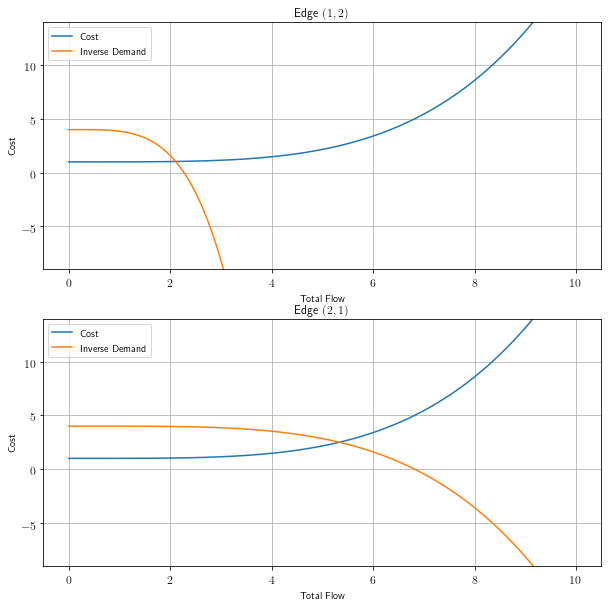

In [5]:
viz_costs(gname+"_costs", phi_p, phi_inv, k_p, k_inv, shift_inv, save = False)

## Solving just one instance to check if it works properly

The below builds the optimization problem. 

In [6]:
f_p, f_r, r, prob = _construct_problem(phi_p, phi_inv, k_p, k_inv, shift_inv)

You can fix a value of the rebalancing guess (the parameter to this problem).

In [7]:
r.value = 0

You can then solve the problem. 

In [8]:
prob.solve(solver = cp.GUROBI)

Academic license - for non-commercial use only


-17.863430942481866

Check the status. 

In [9]:
prob.status

'optimal'

Check the values of the passenger and rebalancing flows. 

In [10]:
f_p.value

array([2.10823898, 5.33809603])

In [11]:
f_r.value

array([1.09701695e-08, 1.09701695e-08])

## Sampling solutions

Now you can sample initial points r_i and run one step of the iteration and compare the metrics. 

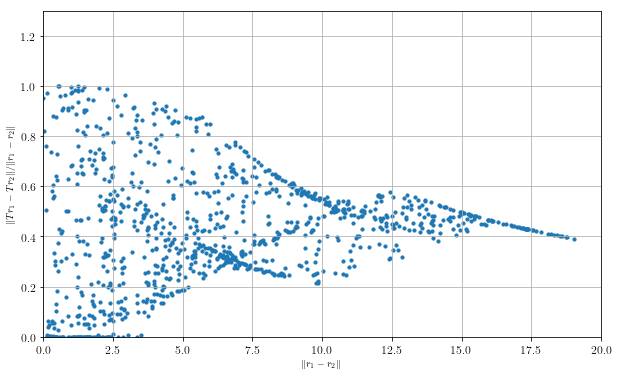

In [12]:
dT, dr = sample_solutions(gname, phi_p, phi_inv, k_p, k_inv, shift_inv, nsamples = 1000, seed=2)

In [13]:
rat = np.divide(dT, dr)

In [14]:
np.max(rat)

0.9980296777320509

## Run complete algorithm

You can also run the complete algorithm for a given number of iterations. 

In [ ]:
phi_p = [1, 1]
phi_inv = [1, 1]
k_p = [7,7]
k_inv = [4, 2]
shift_inv = [5, 5]

In [ ]:
r_tot = run_algorithm(phi_p, phi_inv, k_p, k_inv, shift_inv, nsolutions = 5, seed =0, max_iter = 15)

In [ ]:
from amod_ed.contractivity import plot_results_run

In [ ]:
plot_results_run(r_tot, 'graph_2')

# "natural" algorithm

We can also look at the "natural" algorithm 

In [ ]:
phi_p = [1, 1]
phi_inv = [1, 1]
k_p = [3,5]
k_inv = [3,3]
shift_inv = [10, 10]

In [ ]:
gname = 'natural_1'

In [ ]:
viz_costs_natural(gname+"_costs", phi_p, phi_inv, k_p, k_inv, shift_inv, save = True)

In [ ]:
dT, dd = sample_natural_solutions(gname + '_samples',phi_p, phi_inv, k_p, k_inv, shift_inv, nsamples=1000, seed =1, save = True)